In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.icesat2
reload(asp_plot.icesat2)

from asp_plot.icesat2 import ICESat2

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [22]:
try:
    atl06 = gpd.read_file(os.path.join(directory, "icesat_data", "atl06_all.gpkg"))
    atl06_clean = gpd.read_file(os.path.join(directory, "icesat_data", "atl06_cleaned.gpkg"))
    atl06.index = atl06["time"]
    atl06_clean.index = atl06_clean["time"]
    del atl06["time"], atl06_clean["time"]

    icesat = ICESat2(
        dem_fn=dem_fn, 
        geojson_fn=geojson_fn,
        aligned_dem_fn=aligned_dem_fn,
        atl06=atl06,
        atl06_clean=atl06_clean
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
if icesat.atl06 is None:
    icesat.pull_atl06_data(
        esa_worldcover=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_all")
    )

icesat.atl06


ICESat-2 ATL06 request processing



,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.849838080,312,0.057618,3,0.712761,1,10,0.033456,0.004047,396539,0,5,6,112.929657,2075.261719,7947945.5,POINT (-156.33771 71.24194),51539607552,1.309046e+12,90.0,0
2018-10-19 01:22:42.852651008,312,0.059513,3,0.823991,1,10,0.019844,0.009106,396540,0,10,6,112.929657,2075.311279,7947965.5,POINT (-156.33778 71.24212),51539607552,1.309046e+12,90.0,0
2018-10-19 01:22:42.855464704,312,0.093339,3,0.905593,1,10,0.024544,-0.000860,396541,0,15,6,112.929657,2075.361572,7947985.5,POINT (-156.33786 71.2423),51539607552,1.309046e+12,90.0,0
2018-10-19 01:22:42.858280448,312,0.091363,3,0.905599,1,10,0.021550,0.002180,396542,0,18,6,112.929657,2075.408936,7948005.5,POINT (-156.33793 71.24247),51539607552,1.309046e+12,90.0,0
2018-10-19 01:22:42.861097984,312,0.104050,3,0.946535,1,10,0.024073,0.001642,396543,0,19,6,112.929657,2075.448486,7948025.5,POINT (-156.338 71.24265),51539607552,1.309046e+12,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.405103872,381,0.220518,5,8.967862,23,60,0.063659,-0.009591,605225,0,12,1,3.000000,-3294.771729,12123277.0,POINT (-156.80443 71.248),180388626432,1.309046e+12,90.0,0
2024-04-12 14:33:11.407908608,381,0.149359,5,8.935914,23,60,0.041452,0.008769,605226,0,13,1,3.000000,-3294.732910,12123297.0,POINT (-156.8045 71.24782),180388626432,1.309046e+12,30.0,0
2024-04-12 14:33:11.410712576,381,0.172222,5,9.029394,23,60,0.051959,0.002038,605227,0,11,1,3.000000,-3294.683838,12123317.0,POINT (-156.80457 71.24765),180388626432,1.309046e+12,90.0,0


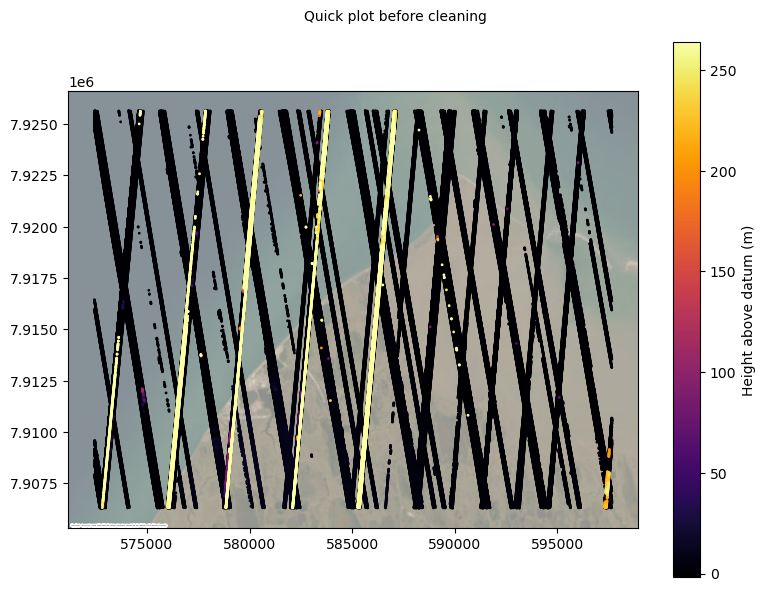

In [5]:
icesat.title = "Quick plot before cleaning"

icesat.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)

In [6]:
# Get only the data that is coincident with the DEM acquisition
if icesat.atl06_clean is None:
    icesat.clean_atl06(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        save_to_csv=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_cleaned"),
    )

icesat.atl06_clean

,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210853120,381,0.512081,5,0.556896,15,10,0.048773,-0.047549,604607,0,138,1,4.182611,3311.720459,12110909.0,POINT (-156.57676 71.35026),704374636544,1.309046e+12,60.0,0
2022-04-17 01:15:56.213661440,381,0.452866,5,-0.066967,15,10,0.027673,-0.022097,604608,0,300,1,3.000000,3311.739014,12110929.0,POINT (-156.57684 71.35008),704374636544,1.309046e+12,50.0,0
2022-04-17 01:15:56.467525632,381,0.123681,5,-0.307942,15,10,0.006363,0.009508,604698,0,379,1,3.000000,3309.855713,12112730.0,POINT (-156.5835 71.33408),704374636544,1.309046e+12,90.0,0
2022-04-17 01:15:56.470364160,381,0.118864,5,-0.187099,15,10,0.006248,0.004371,604699,0,362,1,3.000000,3309.832031,12112750.0,POINT (-156.58357 71.3339),704374636544,1.309046e+12,90.0,0
2022-04-17 01:15:56.473201152,381,0.112785,5,-0.125473,15,10,0.005804,0.003172,604700,0,378,1,3.000000,3309.790283,12112770.0,POINT (-156.58365 71.33372),704374636544,1.309046e+12,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.725474560,381,0.118455,5,10.326173,15,60,0.017196,-0.001089,605033,0,69,6,3.000000,-3314.025146,12119434.0,POINT (-156.79129 71.28218),704374636544,1.309046e+12,90.0,0
2022-04-17 01:15:57.728290560,381,0.123033,5,10.347944,15,60,0.013848,0.003520,605034,0,84,6,3.000000,-3314.061279,12119454.0,POINT (-156.79136 71.282),704374636544,1.309046e+12,90.0,0
2022-04-17 01:15:57.731108608,381,0.125393,5,10.359776,15,60,0.015876,-0.002322,605035,0,64,6,3.000000,-3314.073975,12119474.0,POINT (-156.79143 71.28182),704374636544,1.309046e+12,90.0,0


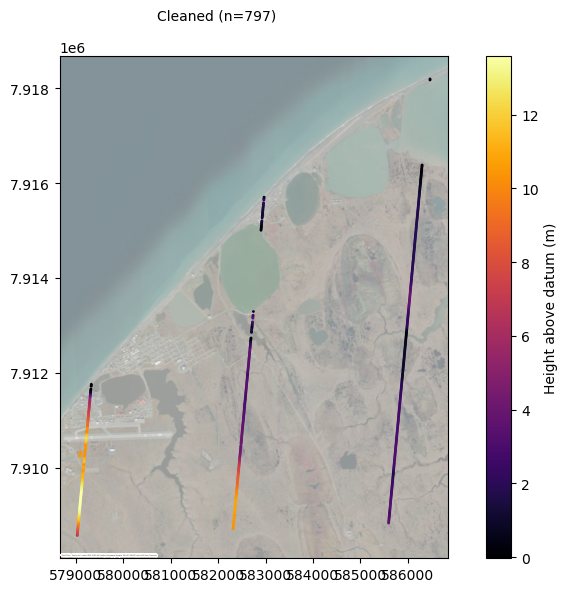

In [7]:
icesat.title = f"Cleaned (n={icesat.atl06_clean.shape[0]})"

icesat.plot_atl06(
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)

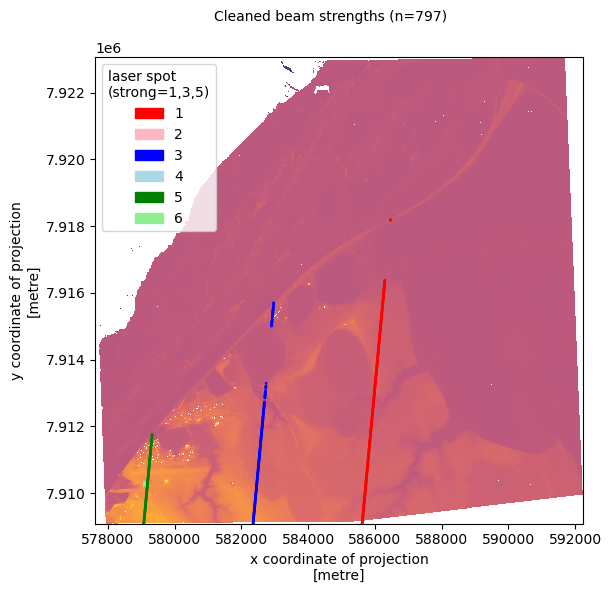

In [8]:
icesat.title = f"Cleaned beam strengths (n={icesat.atl06_clean.shape[0]})"

icesat.plot_atl06(
    clean=True,
    plot_beams=True,
    use_dem_basemap=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



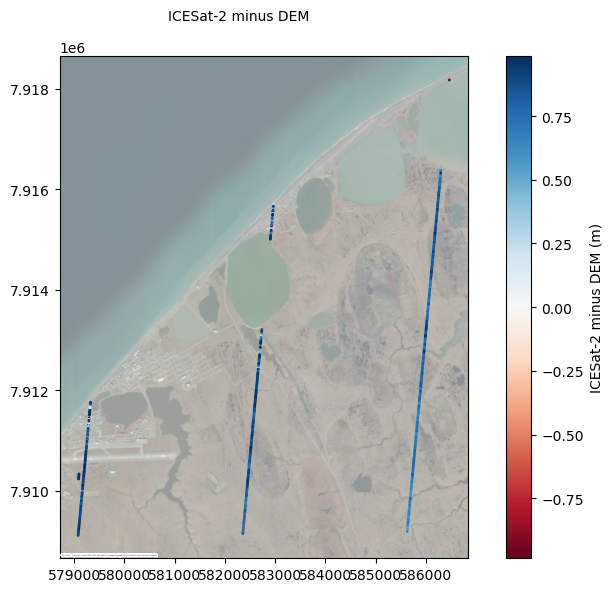

In [9]:
icesat.title = "ICESat-2 minus DEM"
icesat.compare_atl06_to_dem(**ctx_kwargs)

In [10]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06(
    atl06_csv=os.path.join(icesat_directory, "atl06_cleaned.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.



In [11]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.




Using aligned DEM for comparison.



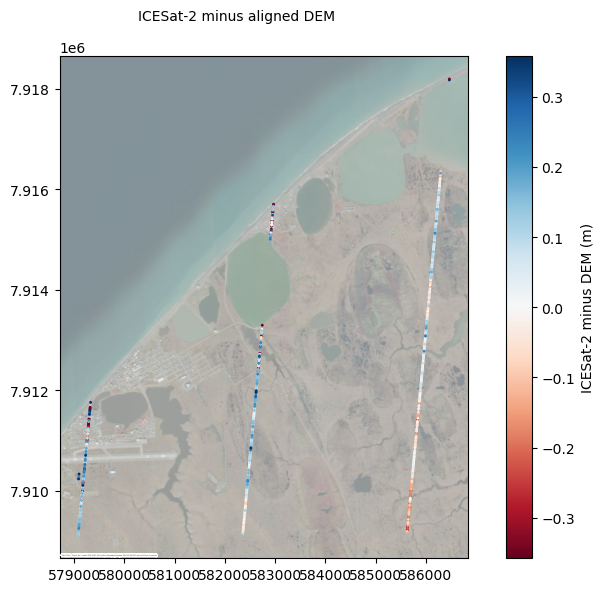

In [14]:
# Quickly compare the translated DEM to the ATL06 data
icesat.title = "ICESat-2 minus aligned DEM"
icesat.compare_atl06_to_dem(use_aligned_dem=True, **ctx_kwargs)

In [24]:
# Gather a larger subset of data for validation
icesat.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    filename_to_save=os.path.join(icesat_directory, "atl06_cleaned_MarchAprilMay_allTime_for_validation"),
)

,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags,geometry
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.769,312,0.236039,3,0.631266,3,30,0.013029,0.065633,396700,0,332,3,3.0,4860.202637,7951167.5,438086664192,1.309046e+12,90.0,0,POINT (-156.42639 71.26731)
2019-04-18 16:42:25.772,312,0.230429,3,1.602373,3,30,0.012672,0.030151,396701,0,340,3,3.0,4860.122559,7951187.5,438086664192,1.309046e+12,30.0,0,POINT (-156.42646 71.26749)
2019-04-18 16:42:25.775,312,0.153822,3,1.966851,3,30,0.007781,0.007473,396702,0,393,3,3.0,4860.057129,7951207.5,438086664192,1.309046e+12,30.0,0,POINT (-156.42653 71.26767)
2019-04-18 16:42:25.778,312,0.153667,3,2.079865,3,30,0.007609,0.003653,396703,0,408,3,3.0,4860.005371,7951227.5,438086664192,1.309046e+12,30.0,0,POINT (-156.4266 71.26785)
2019-04-18 16:42:25.781,312,0.145591,3,2.144606,3,30,0.007432,0.003946,396704,0,391,3,3.0,4859.965820,7951248.0,438086664192,1.309046e+12,30.0,0,POINT (-156.42668 71.26802)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.017,381,0.062522,5,3.923541,23,20,0.025552,0.003314,605076,0,6,5,3.0,3225.771484,12120295.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61347 71.26696)
2024-04-12 14:33:11.020,381,0.109368,5,4.019473,23,20,0.037691,0.012694,605077,0,15,5,3.0,3225.805908,12120315.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61354 71.26678)
2024-04-12 14:33:11.023,381,0.229142,5,4.120587,23,20,0.051944,0.001141,605078,0,21,5,3.0,3225.857666,12120335.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61361 71.2666)



Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



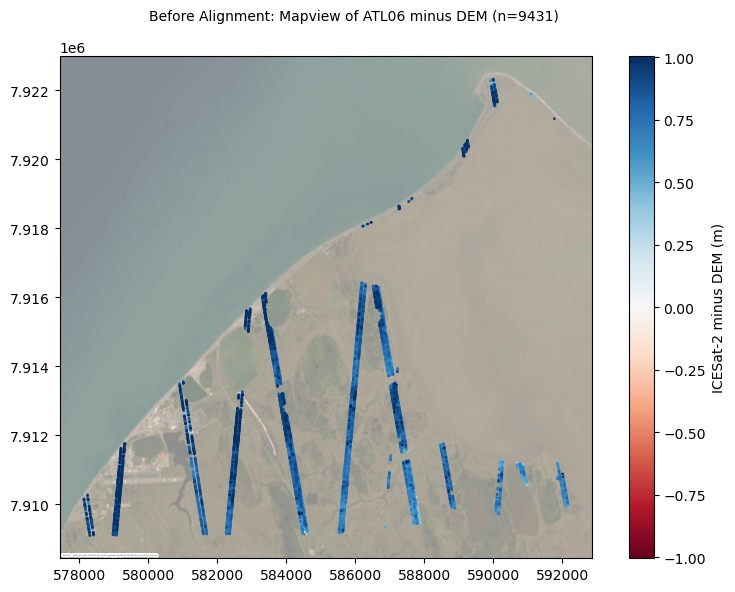

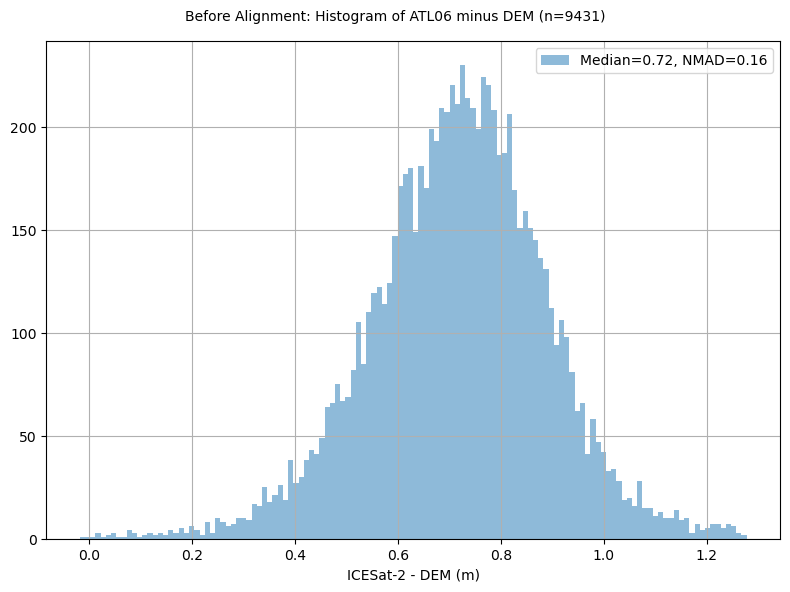

In [25]:
# Validate (before)
icesat.title = f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.compare_atl06_to_dem(**ctx_kwargs)

icesat.title = f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.atl06_dem_histogram()


Using aligned DEM for comparison.



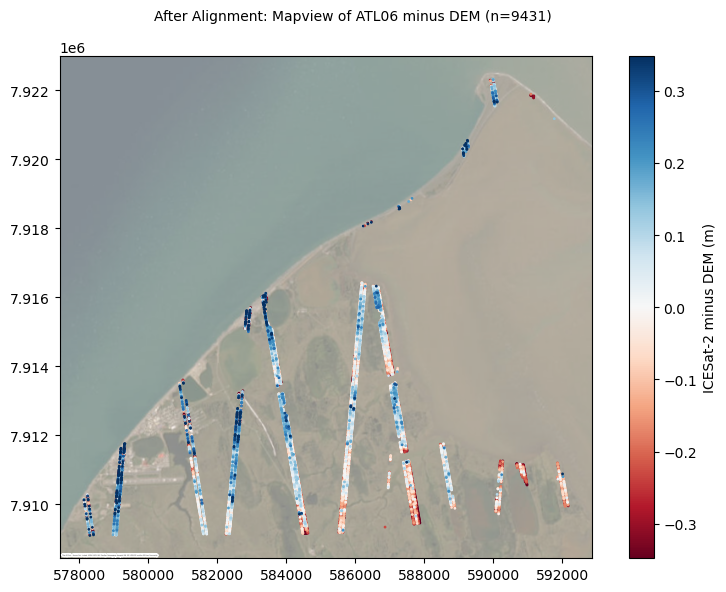

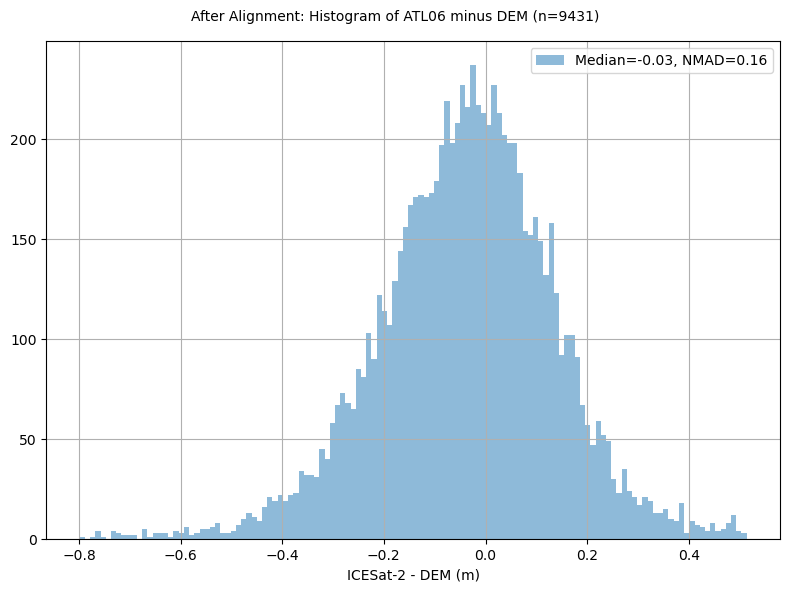

In [26]:
# Validate (after)
icesat.title = f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.compare_atl06_to_dem(use_aligned_dem=True, **ctx_kwargs)

icesat.title = f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})"
icesat.atl06_dem_histogram()